**оценка классификатора**


Евгений Борисов <esborisov@sevsu.ru>


---

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## строим датасет

In [2]:
from sklearn.datasets import make_moons

n_samples=800
X,y = make_moons(n_samples=n_samples, noise=.2)
X.shape, y.shape

((800, 2), (800,))

## выделяем тестовый набор

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.6)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((320, 2), (320,), (480, 2), (480,))

In [4]:
%xdel X
%xdel y

## рисуем датасет

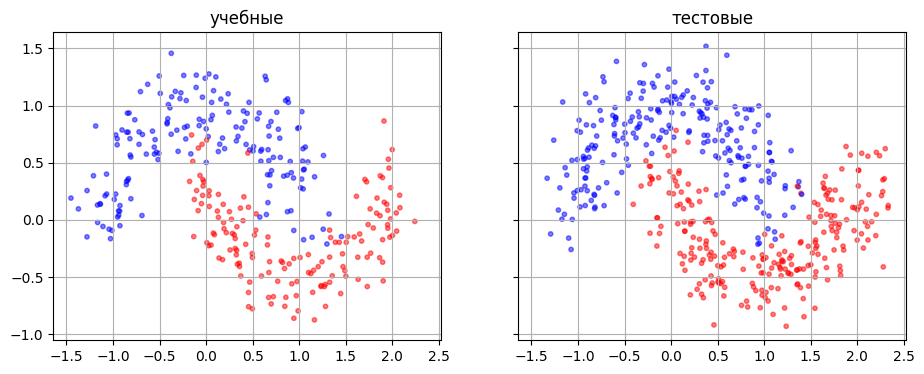

In [7]:
fig, ax = plt.subplots(1,2,sharey=True,sharex=True,figsize=(11,4),)
    
ax[0].set_title('учебные')
ax[0].scatter( x=X_train[:,0], y=X_train[:,1], c=[['b','r','g','y'][j] for j in y_train ], s=10, alpha=0.5 )
ax[0].grid()

ax[1].set_title('тестовые')
ax[1].scatter( x=X_test[:,0], y=X_test[:,1], c=[ ['b','r','g','y'][j] for j in y_test], s=10, alpha=0.5 )
ax[1].grid()

plt.show()

## обучаем клаасификатор

In [10]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(metric='euclidean').fit(X_train,y_train)

## тестируем классификатор

In [11]:
p = model.predict_proba(X_test)
r = (p[:,1]>0.5).astype(int)

### рисуем результат

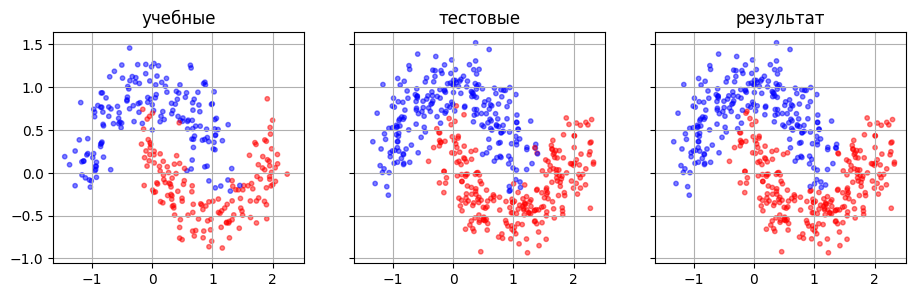

In [12]:
fig, ax = plt.subplots(1,3, sharey=True, sharex=True, figsize=(11,3),)
    
ax[0].set_title('учебные')
ax[0].scatter( x=X_train[:,0], y=X_train[:,1], c=[['b','r','g','y'][j] for j in y_train ], s=10, alpha=0.5 )
ax[0].grid()
ax[1].set_title('тестовые')
ax[1].scatter( x=X_test[:,0], y=X_test[:,1], c=[ ['b','r','g','y'][j] for j in y_test], s=10, alpha=0.5 )
ax[1].grid()
ax[2].set_title('результат')
ax[2].scatter( x=X_test[:,0], y=X_test[:,1], c=[ ['b','r','g','y'][j] for j in r], s=10, alpha=0.5 )
ax[2].grid()

plt.show()

### считаем метрики качества

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

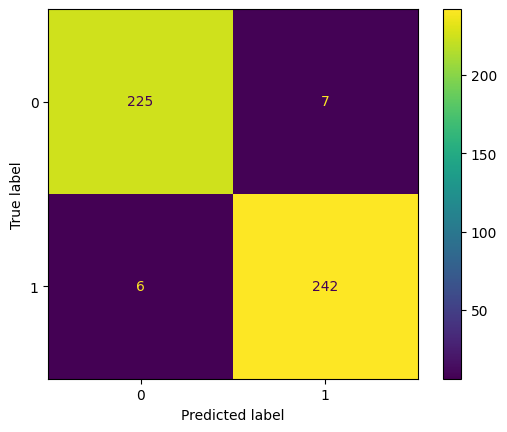

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix(y_test, r), 
        # display_labels=classes
    ).plot()

In [15]:
from sklearn.metrics import classification_report

# таблица метрик качества классификации на тестовом наборе
print( classification_report(y_test,r) )

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       232
           1       0.97      0.98      0.97       248

    accuracy                           0.97       480
   macro avg       0.97      0.97      0.97       480
weighted avg       0.97      0.97      0.97       480



### рисуем ROC

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

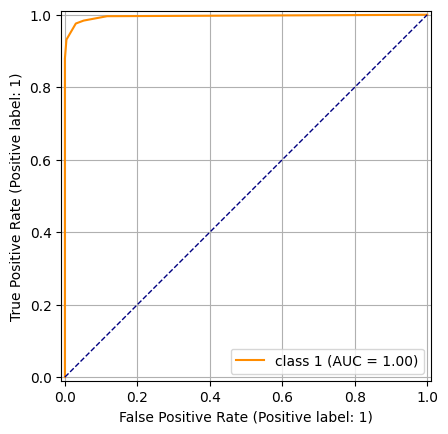

In [16]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions( y_test, p[:,1], name='class 1', color='darkorange', )
plt.plot([0,1],[0,1], color='navy', lw=1, linestyle='--')
plt.grid()

## визуализация результатов класификатора

In [17]:
# строим сетку и определяем значения скора классификатора во всех узлах

n=500 # количество разбиений сетки

xx,yy = np.meshgrid(
    np.linspace( X_test[:,0].min()-0.1, X_test[:,0].max()+0.1, n), 
    np.linspace( X_test[:,1].min()-0.1, X_test[:,1].max()+0.1, n)
) # узлы сетки

display( xx.shape, yy.shape )

xy = np.vstack([xx.ravel(),yy.ravel() ]).T # разворачиваем сетку 
display(xy.shape)

(500, 500)

(500, 500)

(250000, 2)

In [18]:
%%time 

rr = model.predict(xy).reshape(n,n) # вычисляем скор для каждого узла сетки

CPU times: user 6.99 s, sys: 22.7 ms, total: 7.01 s
Wall time: 7.02 s


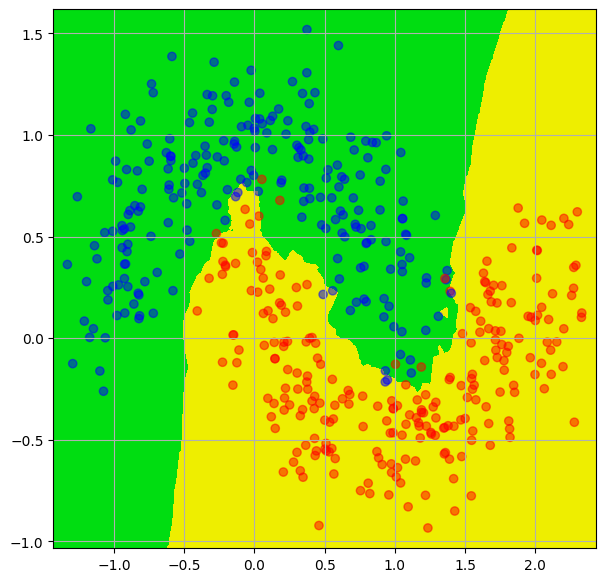

In [20]:
from matplotlib.colors import ListedColormap

cm = ListedColormap(['#00dd11','#eeee00'])
c = [ ['b','r'][ int(j>0.5) ] for j in y_test  ]

plt.figure(figsize=(7,7))
plt.contourf(xx, yy, rr, cmap=cm)
plt.scatter( x=X_test[:,0], y=X_test[:,1], c=c, alpha=.5 )
plt.grid()
plt.show()